<a href="https://colab.research.google.com/github/Teerawa-ctrl/copies_doc_im_processing/blob/main/im_process_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SETUP

In [2]:

import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import Image
from IPython.display import display

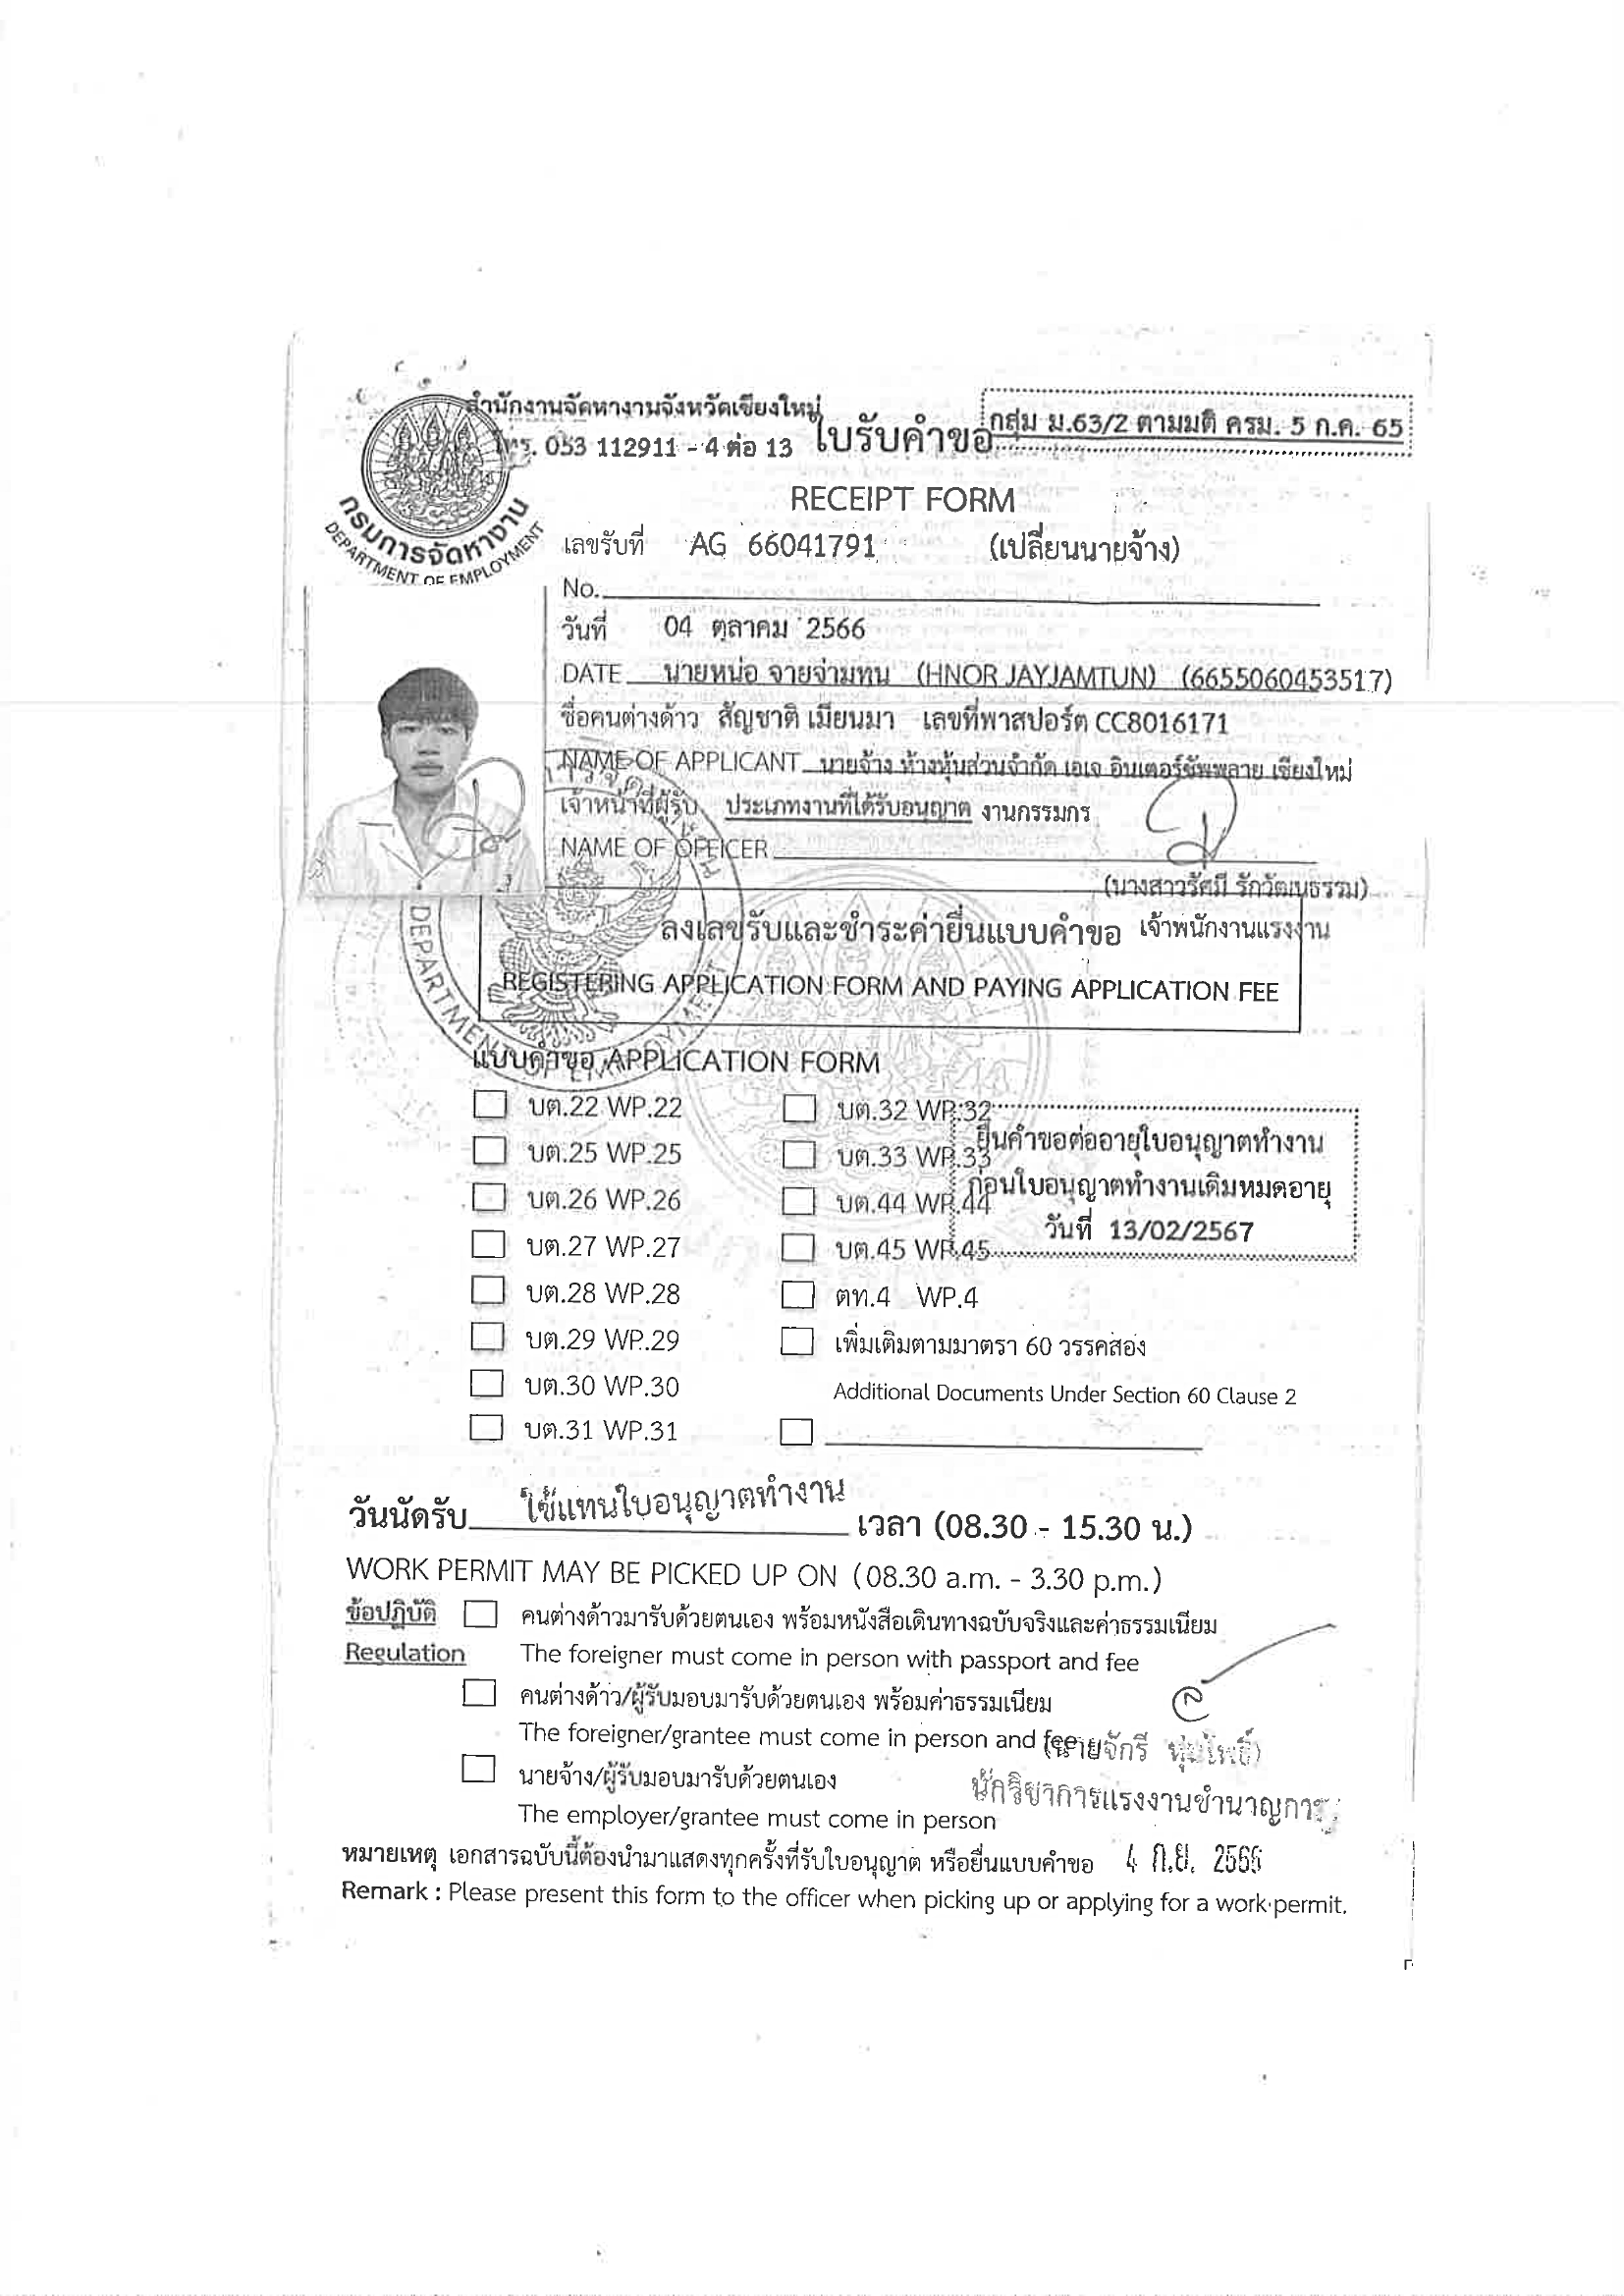

Processed and saved: /content/processed_image_app_receipt/processed_VW2400100_app_receipt_1.png


In [5]:


def process_images_in_folder(input_folder, output_folder):
    # สร้างโฟลเดอร์สำหรับบันทึกผลลัพธ์ถ้ายังไม่มี
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(input_folder, filename)

            # ตรวจสอบว่าไฟล์ถูกอ่านอย่างถูกต้อง
            if not os.path.exists(image_path):
                print(f"File not found: {image_path}")
                continue

            # อ่านรูปภาพ
            image = cv2.imread(image_path, 0)

            # ตรวจสอบว่าอ่านรูปภาพได้อย่างถูกต้อง
            if image is None:
                print(f"Error reading image: {image_path}")
                continue

            # สร้าง Gaussian Blurred image
            blurred_image = cv2.GaussianBlur(image, (21, 21), 0)

            # สร้าง Unsharp Mask
            unsharp_image = cv2.addWeighted(image, 1.5, blurred_image, -0.5, 0)

            # บันทึกรูปภาพที่ประมวลผลแล้ว
            output_image_path = os.path.join(output_folder, f'processed_{filename}')
            cv2.imwrite(output_image_path, unsharp_image)

            # แสดงผลรูปภาพ
            display_image(unsharp_image)

            print(f"Processed and saved: {output_image_path}")

def display_image(image):
    img = Image.fromarray(image)
    display(img)

# กำหนดโฟลเดอร์สำหรับอินพุตและเอาต์พุต
input_folder = '/content/app_receipt'
output_folder = '/content/processed_image_app_receipt'

# เรียกใช้ฟังก์ชันเพื่อดำเนินการกับรูปภาพในโฟลเดอร์
process_images_in_folder(input_folder, output_folder)


In [6]:
# บีบอัดโฟลเดอร์เอาต์พุต
import shutil # import the shutil module to use its functionalities
from google.colab import files # import the files module from google.colab

output_zip = output_folder + '.zip'
shutil.make_archive(output_folder, 'zip', output_folder)

# ดาวน์โหลดไฟล์ zip
files.download(output_zip)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>